<a href="https://colab.research.google.com/github/lmcanavals/cs_topics/blob/main/0501_alldiff_nqueens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N Queens

In [ ]:
!python -m pip install ortools &> /dev/null

In [7]:
from ortools.sat.python import cp_model
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def showBoard(board: list):
    n = len(board)
    b = np.zeros((n, n, 3), dtype=int)
    b[:, :] = [230, 150, 130]
    b[::2, ::2] = [250, 210, 180]
    b[1::2, 1::2] = [250, 210, 180]
    plt.imshow(b)
    for row, col in enumerate(board):
        if col != -1:
            plt.text(col, row, u"\u265B", size=200/n, ha='center', va='center')
    plt.axis("off")
    plt.show()

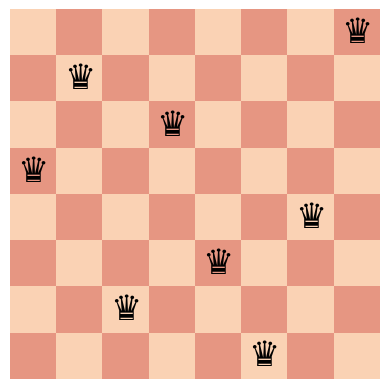

In [12]:
model = cp_model.CpModel()

n = 8
queens = [model.NewIntVar(0, n-1, f"x_{i}") for i in range(n)]
model.AddAllDifferent(queens)
model.AddAllDifferent(queens[i] + i for i in range(n))
model.AddAllDifferent(queens[i] - i for i in range(n))

solver = cp_model.CpSolver()
if solver.Solve(model) == cp_model.OPTIMAL:
    board = [solver.Value(queens[i]) for i in range(n)]
    showBoard(board)
else:
    print(":(")